# Multiple Linear Regression

### Defining model hypothesis

Let's assume our model has 5 model parameters. Our hypothesis function will look like this:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5$$

Any model that has <b>n</b> parameters can be defined as:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$$

<br>

### Cost function for linear regression with multiple variables

Cost function for linear regression with multiple variables can be written using matrix notation and vectors:

$$MSE = J(\theta) = \frac{1}{2m}(X\theta - |\vec{y}|)^T (X\theta - \vec{y})$$

where:

$\frac{1}{2m}$ is an expression to calculate $half$ of MSE per prediction. We're taking half of MSE due to convenience when calculating the derivative of MSE.

$X$ is a feature matrix, where each column corresponds to a different variable, and $\theta$  is a parameter vector, so $X\theta$ represents the vector of predicted values (matrix multiplied by a vector results in a vector).

$\vec{y}$ is a vector of actual values.

$(X\theta - \vec{y})$ = $
\begin{bmatrix}
e_1 \\
e_2 \\
\vdots \\
e_m \\
\end{bmatrix}
$  is the <b>vector of error</b>, or vector of residuals. It can be read as the difference between the vector of predicted values and the vector of actual values.

$(X\theta - \vec{y})^T$ is the <b>transposition</b> of the vector of error. If vector of error was a column vector, then the transpose of voe turns into a row vector. If voe was a row vector, then the transpose of voe turns into a column vector.

$(X\theta - \vec{y})^T(X\theta - \vec{y})$ is a <b>dot product</b> between transpose of voe and voe.

Calculating the dot product:

$(X\theta - \vec{y})^T(X\theta - \vec{y})$ = $
\begin{bmatrix}
e_1 \\
e_2 \\
\vdots \\
e_m \\
\end{bmatrix}
$ × $\begin{bmatrix} e_1 & e_2 & \cdots & e_m \end{bmatrix}$ = $e_1 * e_1 + e_2 * e_2 + ... + e_m * e_m $ = $e_1^2 + e_2^2 + ... + e_m^2$

<br>

### Gradient of the mean squared error (MSE)

$$\nabla(\theta) = \frac{1}{m}X^T(X\theta - \vec{y})$$

$X^T$ - transpose of the feature matrix X.

$X\theta$ - vector of predicted values.

$(X\theta - y)$ - vector of error.

$X^T(X\theta - y)$ - dot product of vector of error and feature matrix.

$\frac{1}{m}$ - used to calculate average across all samples.

<br>

Gradient of MSE is used to iteratively update the parameter vector $\theta$.

Feature vector is updated using this equation:

$$\theta := \theta - \alpha \nabla J(\theta)$$

### Implementing Multiple Linear Regression

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Load data to dataframe:

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")

df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


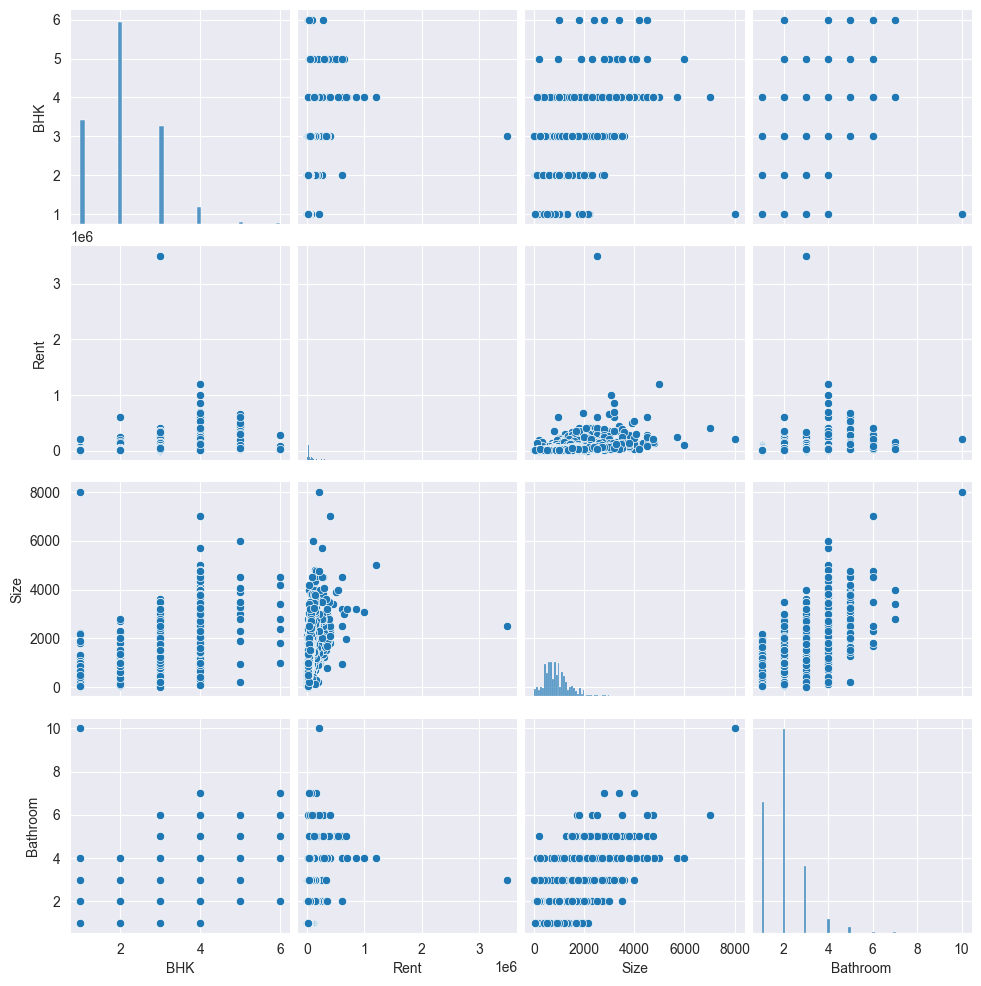

In [3]:
sns.pairplot(df)

In [4]:
df = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])

In [5]:
df['BHK'], df['Rent'] = df['Rent'].copy(), df['BHK'].copy()
df.rename(columns={'BHK' : 'Rent', 'Rent' : 'BHK'}, inplace=True)

In [6]:
df.head(10)

,Posted On,Rent,BHK,Size,Floor,Area Locality,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,10000,2,1100,Ground out of 2,Bandel,2,False,False,True,...,False,False,False,True,False,True,False,False,False,True
1,2022-05-13,20000,2,800,1 out of 3,"Phool Bagan, Kankurgachi",1,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,2022-05-16,17000,2,1000,1 out of 3,Salt Lake City Sector 2,1,False,False,True,...,False,False,True,False,False,True,False,False,False,True
3,2022-07-04,10000,2,800,1 out of 2,Dumdum Park,1,False,False,True,...,False,False,False,True,False,True,False,False,False,True
4,2022-05-09,7500,2,850,1 out of 2,South Dum Dum,1,False,True,False,...,False,False,False,True,True,False,False,False,False,True
5,2022-04-29,7000,2,600,Ground out of 1,Thakurpukur,2,False,False,True,...,False,False,False,True,False,True,False,False,False,True
6,2022-06-21,10000,2,700,Ground out of 4,Malancha,2,False,False,True,...,False,False,False,True,True,False,False,True,False,False
7,2022-06-21,5000,1,250,1 out of 2,Malancha,1,False,False,True,...,False,False,False,True,True,False,False,True,False,False
8,2022-06-07,26000,2,800,1 out of 2,"Palm Avenue Kolkata, Ballygunge",2,False,True,False,...,False,False,False,True,True,False,False,True,False,False
9,2022-06-20,10000,2,1000,1 out of 3,Natunhat,2,False,True,False,...,False,False,True,False,False,True,False,False,False,True


In [7]:
df = df.drop(['Posted On', 'Floor', 'Area Locality'], axis=1)

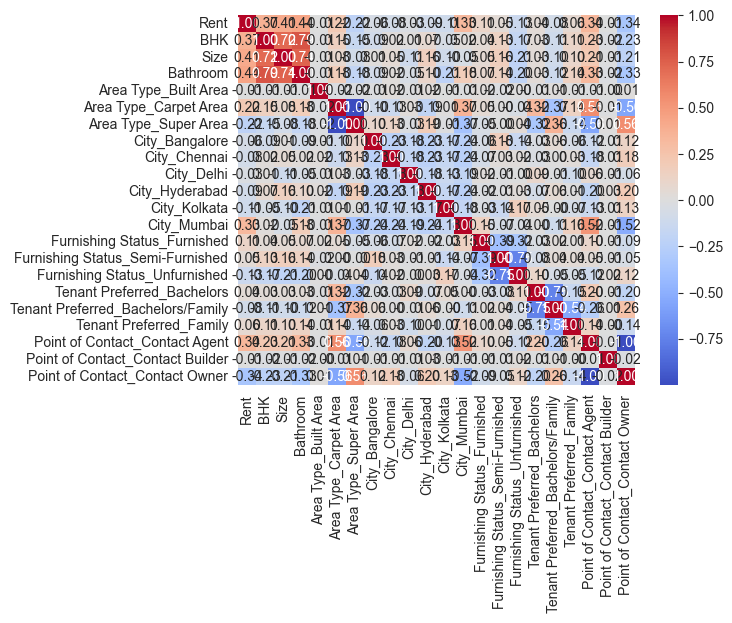

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [9]:
y = df['Rent']
X = df.drop(['Rent'], axis=1)

In [10]:
X.head(10)

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,800,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,1000,1,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,800,1,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,850,1,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
5,2,600,2,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
6,2,700,2,False,False,True,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
7,1,250,1,False,False,True,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
8,2,800,2,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
9,2,1000,2,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = regr.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, predictions)
mse

1623301985.794644

In [15]:
regr.score(X_test, y_test)

0.5387493018939309

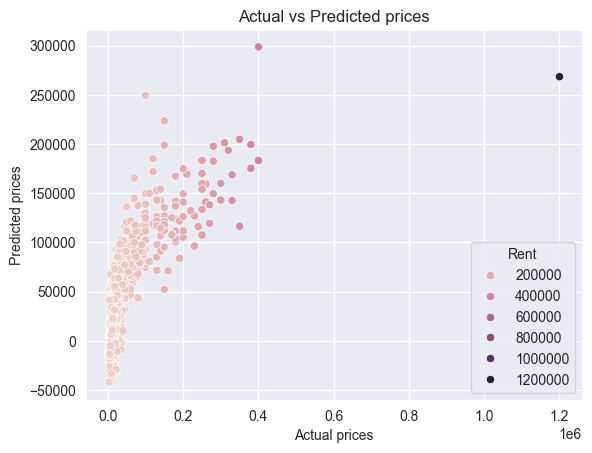

In [16]:
sns.scatterplot(x=y_test, y=predictions, hue_order=[y_test, predictions], hue=y_test)
plt.title('Actual vs Predicted prices')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()